In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import tensorflow as tf 
from tensorflow import keras 

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [3]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
x_valid, x_train = x_train[:4000], x_train[4000:]/255
y_valid, y_train = y_train[:4000], y_train[4000:]
x_test = x_test/255

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_names[y_train[0]], class_names[y_train[1]]

('Bag', 'Coat')

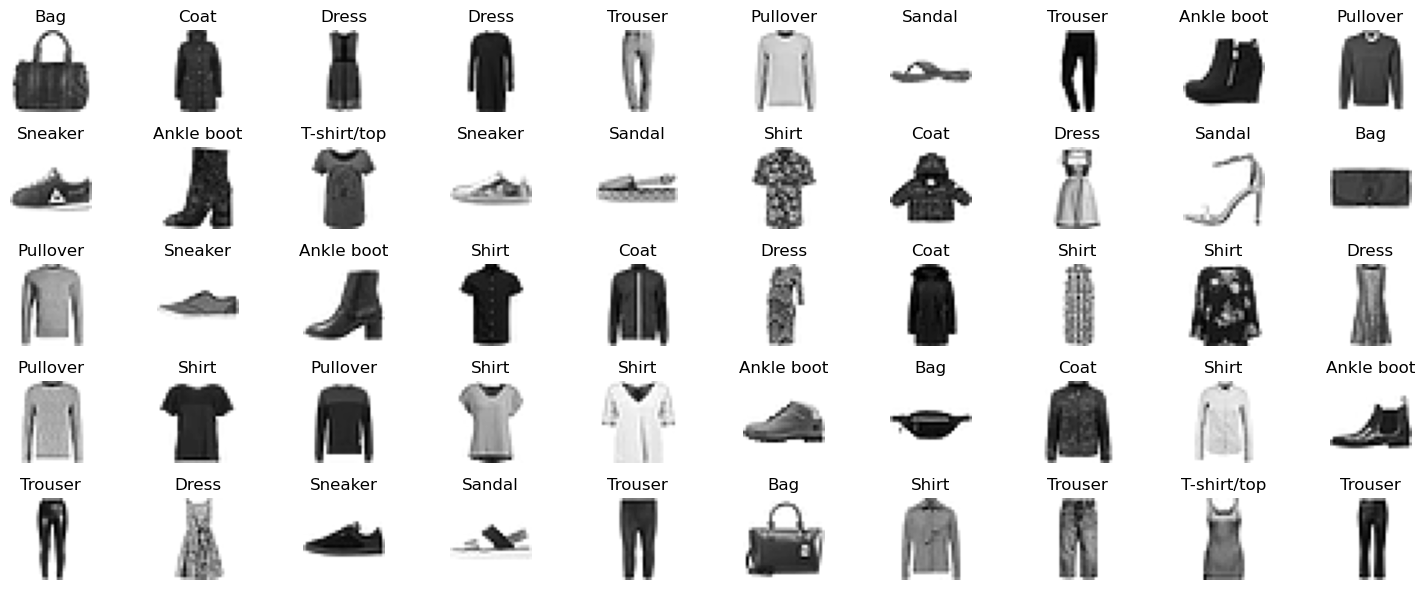

In [7]:
plt.figure(figsize = (15, 6))
plotnumber = 1

for i in range(51):
    if plotnumber <= 50:
        ax = plt.subplot(5, 10, plotnumber)
        plt.imshow(x_train[i], cmap = 'binary')
        plt.axis('off')
        plt.title(class_names[y_train[i]], fontdict = {'fontsize' : 12, 'color' : 'black'})
        
    plotnumber += 1 

plt.tight_layout()
plt.show()

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(70,  activation = 'relu'),
    keras.layers.Dense(50,  activation = 'relu'),
    keras.layers.Dense(20,  activation = 'relu'),
    keras.layers.Dense(10,  activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 70)                7070      
                                                                 
 dense_2 (Dense)             (None, 50)                3550      
                                                                 
 dense_3 (Dense)             (None, 20)                1020      
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 90,350
Trainable params: 90,350
Non-traina

In [9]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [10]:
history = model.fit(x_train, y_train, validation_data = (x_valid, y_valid), epochs = 100)

Epoch 1/100
1750/1750 [==============================] - 9s 4ms/step - loss: 0.5423 - accuracy: 0.8089 - val_loss: 60.0862 - val_accuracy: 0.8405
Epoch 2/100
1750/1750 [==============================] - 7s 4ms/step - loss: 0.3862 - accuracy: 0.8605 - val_loss: 54.0872 - val_accuracy: 0.8540
Epoch 3/100
1750/1750 [==============================] - 9s 5ms/step - loss: 0.3470 - accuracy: 0.8733 - val_loss: 64.0127 - val_accuracy: 0.8378
Epoch 4/100
1750/1750 [==============================] - 19s 11ms/step - loss: 0.3247 - accuracy: 0.8800 - val_loss: 53.9109 - val_accuracy: 0.8540
Epoch 5/100
1750/1750 [==============================] - 15s 9ms/step - loss: 0.3074 - accuracy: 0.8857 - val_loss: 86.0048 - val_accuracy: 0.8130
Epoch 6/100
1750/1750 [==============================] - 16s 9ms/step - loss: 0.2919 - accuracy: 0.8913 - val_loss: 59.1919 - val_accuracy: 0.8522
Epoch 7/100
1750/1750 [==============================] - 15s 9ms/step - loss: 0.2797 - accuracy: 0.8968 - val_loss: 62.7

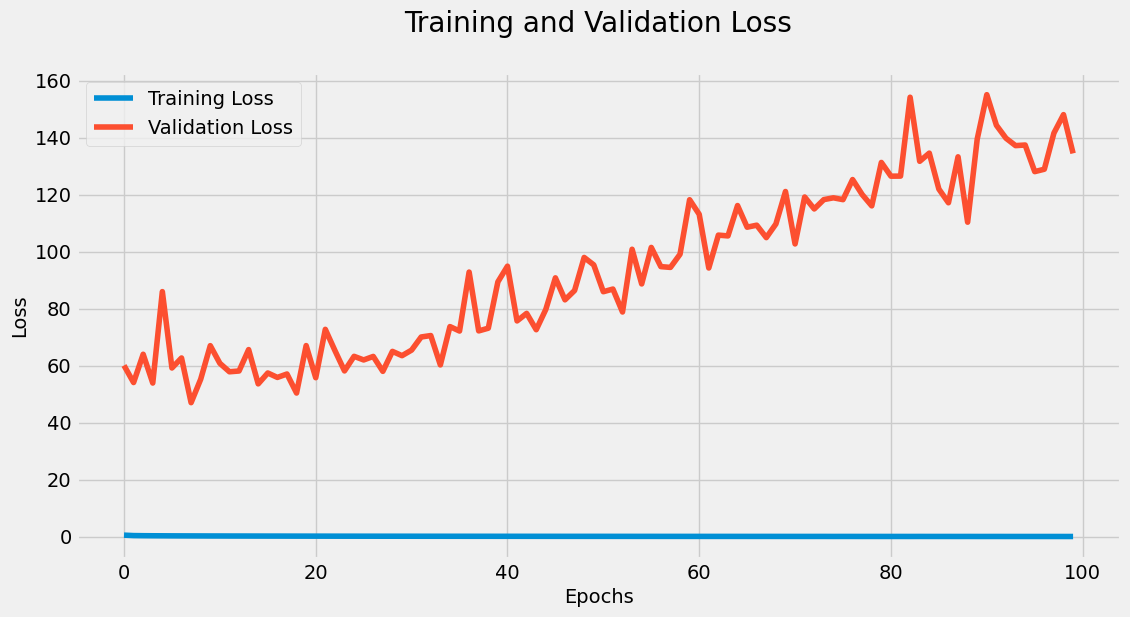

In [16]:
plt.figure(figsize = (12, 6))
plt.style.use('fivethirtyeight')

train_loss = history.history['loss']
val_loss = history.history['val_loss'] 
epoch = range(1, 101)
sns.lineplot(train_loss, label = 'Training Loss')
sns.lineplot(val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

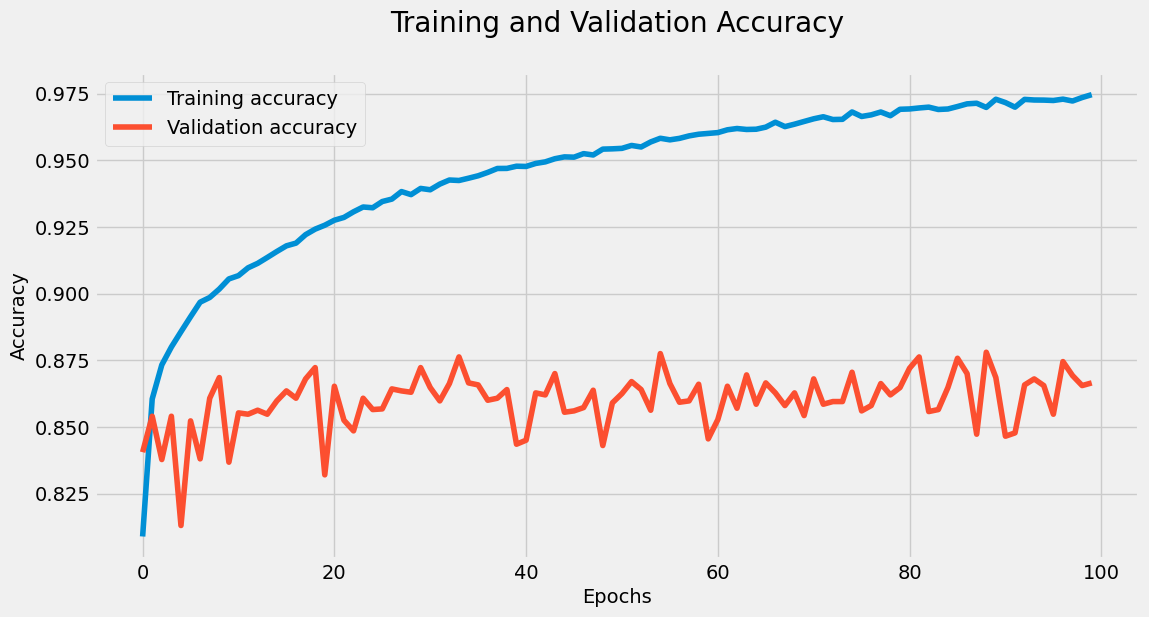

In [18]:
plt.figure(figsize = (12, 6))

train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy'] 
epoch = range(1, 101)
sns.lineplot(train_loss, label = 'Training accuracy')
sns.lineplot(val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

In [19]:
# making predictions 

y_probs = model.predict(x_test)
y_preds = y_probs.argmax(axis = 1)
y_preds[:100]

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5,
       7, 5, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7,
       6, 7, 2, 1, 2, 6, 4, 2, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1,
       6, 4, 7, 8, 7, 0, 2, 8, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 2, 5, 3, 6, 7, 1, 8, 6, 1, 4, 6], dtype=int64)

In [20]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 44ms/step


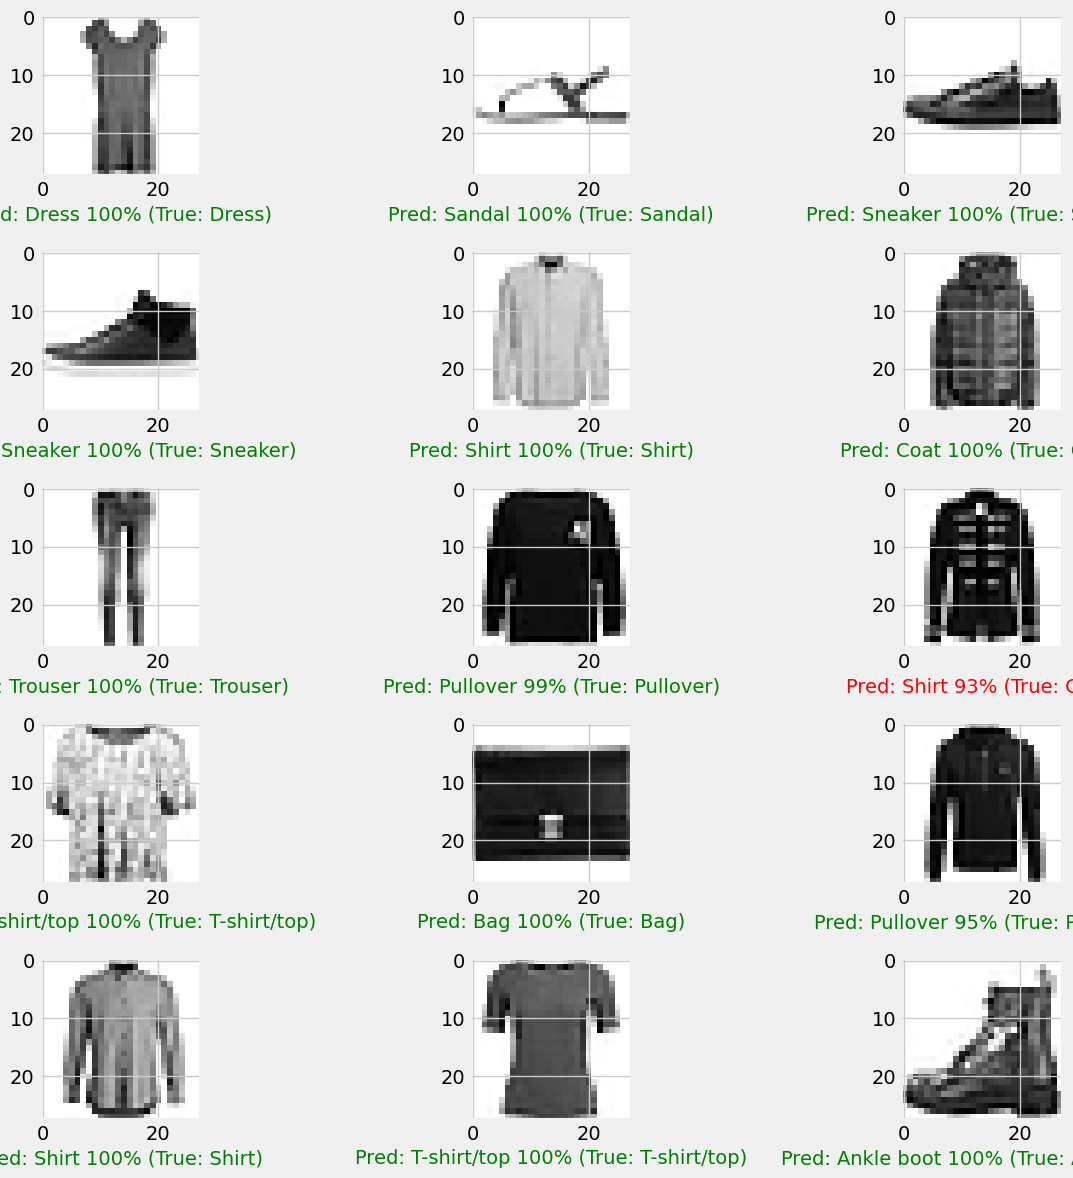

In [21]:
plt.figure(figsize = (15, 12))
plotnumber = 1

for i in range(15):
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        plot_random_image(model=model, 
                  images=x_test, 
                  true_labels=y_test, 
                  classes=class_names)
        
    plotnumber += 1
  
plt.tight_layout()
plt.show()